In [2]:
import numpy as np
from PIL import Image
def func1(img):
    img = np.transpose(img,(2,1,0))
    img = img[0]*0.3 + img[1]*0.5+img[2]*0.2
    return img

img = Image.open('pepper.bmp')
img = np.array(img)
img = func1(img)
print(img.shape)
img = Image.fromarray(img)

img.show()


(512, 512)


In [3]:
def func2(img,offset):
    img = np.transpose(img,(2,0,1))
    for c in range(img.shape[0]):
        for j in range(img.shape[1]):
            for i in range(img.shape[2]):
                if img[c,j,i]+offset>=255:
                    img[c,j,i]=255
                elif img[c,j,i]+offset<=0:
                    img[c,j,i]=0
                else:
                    img[c,j,i]+=offset
    img = np.transpose(img,(1,2,0))
    return img

img = Image.open('pepper.bmp')
img = np.array(img)
img = func2(img,10)
print(img.shape)
img = Image.fromarray(img)
img.show()


(512, 512, 3)


In [ ]:
from collections import deque

def func3(img, crop_size = (128,128)):

    frames = []
    dy = [0,1,0,-1]
    dx = [1,0,-1,0]
    start = (0,0)
    
    q = deque()
    q.append(start)
    visit = set()
    #visit.add(start)
    frames.append(img[start[0]:start[0]+crop_size[0],start[0]:start[1]+crop_size[1],:])
    idx = 0
    while q:
        cy,cx = q.popleft()
        if (cy,cx) not in visit:
            visit.add((cy,cx))
            frames.append(img[cy:cy+crop_size[0], cx:cx+crop_size[1],:])
        else:
            continue
        ny = cy+dy[idx]
        nx = cx+dx[idx]
        if ny>=0 and ny+crop_size[0]<img.shape[0] and nx>=0 and nx+crop_size[1]<img.shape[1]:
            q.append((ny,nx))
        else:
            idx+=1
            idx%=4
            ny = cy+dy[idx]
            nx = cx+dx[idx]
            
            q.append((ny,nx))
    
    return np.array(frames)

img = Image.open('pepper.bmp')
img = np.array(img)
video = func3(img)
print(video.shape)

###출력###
for i in range(video.shape[0]):
    plt.imshow(video[i]),  plt.axis('off')
    plt.show()

          

<BarContainer object of 255 artists>

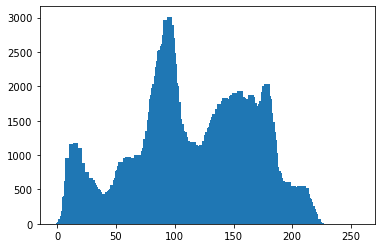

In [30]:
def func4(img,N):
    
    def func1(img):
        img = np.transpose(img,(2,1,0))
        img = img[0]*0.3 + img[1]*0.5+img[2]*0.2
        return img
    
    img = func1(img)
    
    cands = np.arange(0,256,256//N)
    #print(cands)
    dic = {}
    img_list = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            img_list.append(int(img[i][j]))
    #img_list = np.array(img_list)
    
    for i in range(len(cands)-1):
        temp = np.array(img_list)
        temp = (temp >= cands[i]) & (temp < cands[i+1])
        dic[(cands[i]+cands[i+1])/2] = np.sum(temp)
    return dic


img = Image.open('pepper.bmp')
img = np.array(img)
#img = func1(img)
hist = func4(img,256)
#print(hist)
plt.bar(hist.keys(),hist.values(),width = 5)



C:\Users\kke26\anaconda3\envs\uchanpython\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\kke26\anaconda3\envs\uchanpython\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


threshold :  113.5


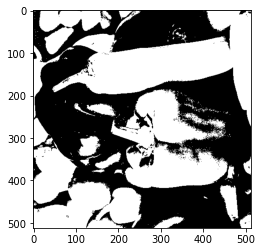

In [5]:
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt




def func5(img,N):
    ### dynamic programming으로 할것###
    def sub_func_1(img):
        img = np.transpose(img,(2,1,0))
        img = img[0]*0.3 + img[1]*0.5+img[2]*0.2
        return img
    
    def sub_func_2(img,N):

        #img = sub_func_1(img)

        cands = np.arange(0,256,256//N)
        dic = {}
        img_list = []
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):

                img_list.append(int(img[i][j]))
        #img_list = np.array(img_list)

        for i in range(len(cands)-1):
            temp = np.array(img_list)
            temp = (temp >= cands[i]) & (temp < cands[i+1])
            dic[(cands[i]+cands[i+1])/2] = np.sum(temp)
        return dic
    img = sub_func_1(img)
    dic = sub_func_2(img,N)
    
    comp = 9999999999
    result=0
    thresholds = [key for key in dic.keys()]
    total = sum(dic.values())
    
    w0 = []
    u0 = []
    mean = 0
    for k,v in dic.items():
        mean += k*v
    mean/=total
    v=[]
    for idx, threshold in enumerate(thresholds):
        if idx==0:
            w0.append(dic[threshold]/total)
            u0.append(0)
            continue
        w0.append(w0[idx-1]+dic[threshold]/total)
        u0.append((w0[idx-1] * u0[idx-1] + threshold*dic[threshold]/total)/w0[idx])
        u1 = (mean-w0[idx]*u0[idx])/(1-w0[idx])
        if not math.isnan((w0[idx]*(1-w0[idx]))*((u0[idx]-u1)**2)):
            v.append(int((w0[idx]*(1-w0[idx]))*((u0[idx]-u1)**2)))
    final_threshold = list(dic.keys())[np.argmax(np.array(v))]
    result = np.zeros(img.shape)
    #print(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            if img[i,j]<final_threshold:
                result[i,j]=0
            else:
                result[i,j]=1
    print('threshold : ',final_threshold)
    return result

img = Image.open('pepper.bmp')
img = np.array(img)

#hist = func4(img,10)
#img = func1(img)
result = func5(img,256)

plt.imshow(result,cmap='gray')
